In [45]:
# Instalando Scikit Learn, joblib, matplotlib, pandas
!pip install scikit-learn joblib matplotlib pandas

In [46]:
# Importando os pacotes
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib
import matplotlib.pyplot as plt

In [47]:
# Lendo o CSV com as observações
train_data = pd.read_csv('./train_data.csv')

In [48]:
# "describe" da base
train_data.describe()

,map1Team1SideBothPlayer1PlusMinus,map1Team1SideBothPlayer1Rating,map1Team1SideBothPlayer2PlusMinus,map1Team1SideBothPlayer2Rating,map1Team1SideBothPlayer3PlusMinus,map1Team1SideBothPlayer3Rating,map1Team1SideBothPlayer4PlusMinus,map1Team1SideBothPlayer4Rating,map1Team1SideBothPlayer5PlusMinus,map1Team1SideBothPlayer5Rating,...,map5Team2SideBothPlayer1PlusMinus,map5Team2SideBothPlayer1Rating,map5Team2SideBothPlayer2PlusMinus,map5Team2SideBothPlayer2Rating,map5Team2SideBothPlayer3PlusMinus,map5Team2SideBothPlayer3Rating,map5Team2SideBothPlayer4PlusMinus,map5Team2SideBothPlayer4Rating,map5Team2SideBothPlayer5PlusMinus,map5Team2SideBothPlayer5Rating
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000
mean,6.199364,1.416425,2.670740,1.212851,0.194342,1.076093,-2.170907,0.950527,-5.160864,0.797603,...,0.010713,0.002101,0.004185,0.001908,0.001841,0.001600,-0.004687,0.001406,-0.010880,0.001111
std,5.571951,0.325322,4.915311,0.270875,4.632074,0.247110,4.512989,0.234653,4.675193,0.229990,...,0.326648,0.054989,0.191435,0.050325,0.127422,0.041544,0.179228,0.036502,0.296272,0.028851
min,-10.000000,0.000000,-12.000000,0.000000,-13.000000,0.000000,-16.000000,0.000000,-23.000000,0.000000,...,0.000000,0.000000,-4.000000,0.000000,-5.000000,0.000000,-8.000000,0.000000,-13.000000,0.000000
25%,2.000000,1.190000,-1.000000,1.030000,-3.000000,0.910000,-6.000000,0.790000,-9.000000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.380000,3.000000,1.200000,0.000000,1.080000,-2.000000,0.950000,-5.000000,0.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.610000,6.000000,1.390000,4.000000,1.240000,1.000000,1.100000,-2.000000,0.950000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,3.070000,19.000000,2.290000,16.000000,1.920000,12.000000,1.780000,11.000000,1.690000,...,14.000000,2.010000,8.000000,1.950000,6.000000,1.370000,2.000000,1.180000,0.000000,0.880000


In [49]:
# "info" da base
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Columns: 102 entries, teamOneWon to map5Team2SideBothPlayer5Rating
dtypes: bool(2), float64(50), int64(50)
memory usage: 4.6 MB


In [50]:
# Verificando a existência de entradas nulas
train_data.isnull().sum().max()

np.int64(0)

In [51]:
# Verificando observações duplicadas
train_data.duplicated().any()

np.False_

# Treinando o Modelo

## Florestas Aleatórias

Relatório de Classificação com linha ajustada:
              precision    recall  f1-score   support

       False       0.88      0.89      0.89       568
        True       0.90      0.89      0.90       627

    accuracy                           0.89      1195
   macro avg       0.89      0.89      0.89      1195
weighted avg       0.89      0.89      0.89      1195

ROC AUC com linha ajustada: 0.8920763416223015
Cross-Validation: [0.91882845 0.85020921 0.93389121 0.91966527 0.89447236]
Média Cross-Validation: 0.9034133008136918


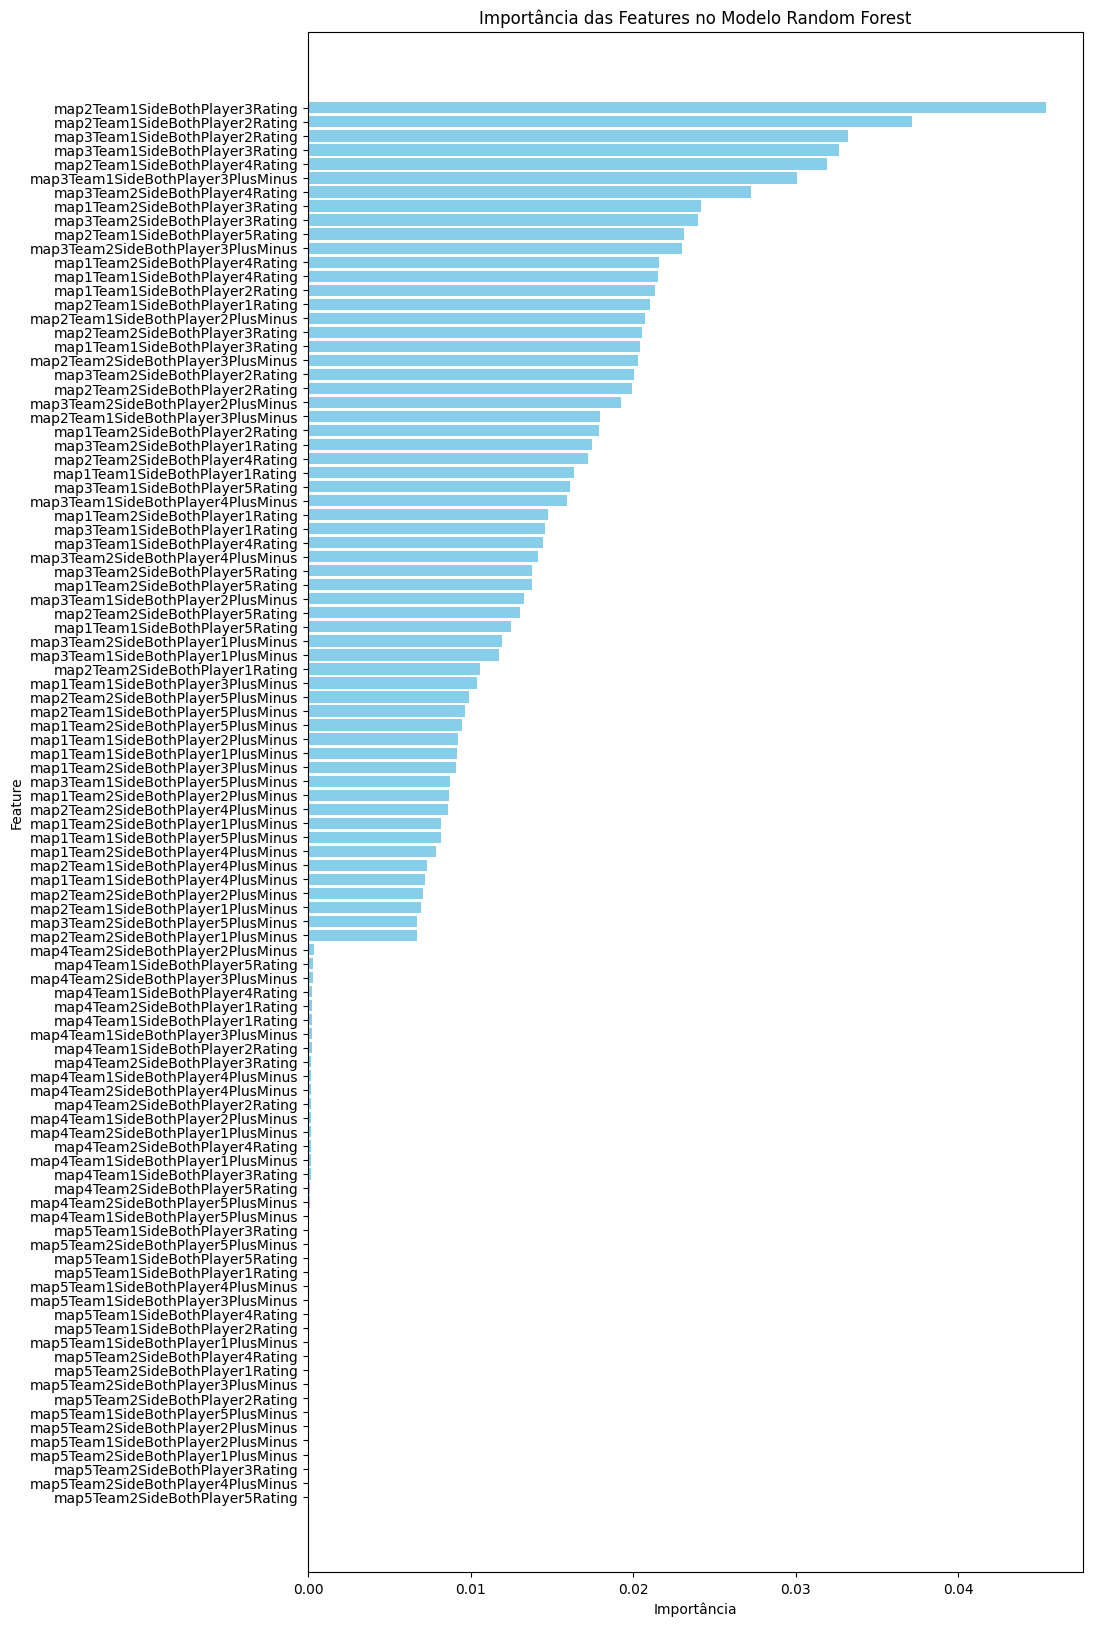

Acurácia do Modelo de Random Forest: 0.89
Score do modelo de Random Forest: 0.8920502092050209
              precision    recall  f1-score   support

       False       0.88      0.89      0.89       568
        True       0.90      0.89      0.90       627

    accuracy                           0.89      1195
   macro avg       0.89      0.89      0.89      1195
weighted avg       0.89      0.89      0.89      1195



In [52]:
# Features (colunas que serão utilizadas para fazer a previsão)
X = train_data.drop(['teamOneWon', 'teamTwoWon'], axis=1)

# Target (coluna que será prevista)
y = train_data['teamOneWon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo Random Forest
clf = RandomForestClassifier(bootstrap=False, min_samples_split=10, random_state=42)

clf.fit(X_train, y_train)

# Fazendo previsões de probabilidade no conjunto de teste.
y_prob = clf.predict_proba(X_test)[:, 1]

# Fazendo previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Definindo a linha de corte para as classes "1"
new_threshold = 0.5

# Aplicar a linha de corte para classificar as observações nas classes "1" ou "0"
y_pred_adjusted = (y_prob >= new_threshold).astype(int)

# Evaluate the model using classification report and ROC AUC score
print("Relatório de Classificação com linha ajustada:")
print(classification_report(y_test, y_pred_adjusted))

auc_score_adjusted = roc_auc_score(y_test, y_pred_adjusted)
print("ROC AUC com linha ajustada:", auc_score_adjusted)

# Avaliação com validação cruzada
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation: {cv_scores}')
print(f'Média Cross-Validation: {cv_scores.mean()}')

# Retornando as "feature importances" do classificador treinado
feature_importances = clf.feature_importances_

# Criando um DataFrame para guardar as "feature importances" junto com as variáveis
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordenando o DataFrame em ordem descendente de importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features no Modelo Random Forest')
plt.gca().invert_yaxis()  # Coloca a feature mais importante no topo
plt.show()

# Salvando o modelo treinado em um arquivo
model_filename = 'trained_model.joblib'
joblib.dump(clf, f"./{model_filename}")

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo de Random Forest: {accuracy:.2f}')
print(f"Score do modelo de Random Forest: {clf.score(X_test, y_test)}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

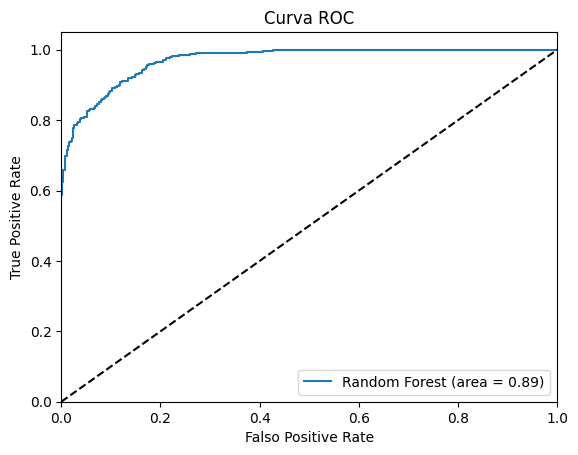

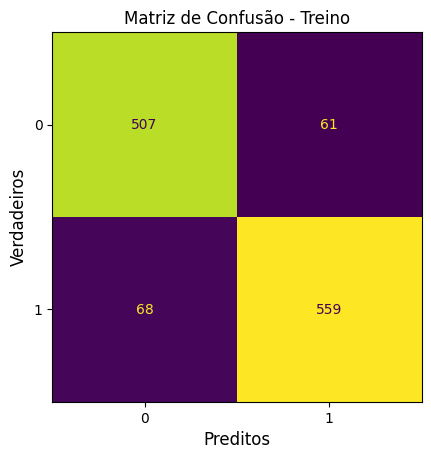

In [72]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Plotando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc_score_adjusted)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(colorbar=False)
plt.title('Matriz de Confusão - Treino')
plt.xlabel('Preditos', fontsize=12)
plt.ylabel('Verdadeiros', fontsize=12)
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Melhores parâmetros: {grid_search.best_params_}')
best_clf = grid_search.best_estimator_
best_clf

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300, random_state=42)

### Avaliando o Modelo

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         7
        True       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Acurácia do modelo: 1.00


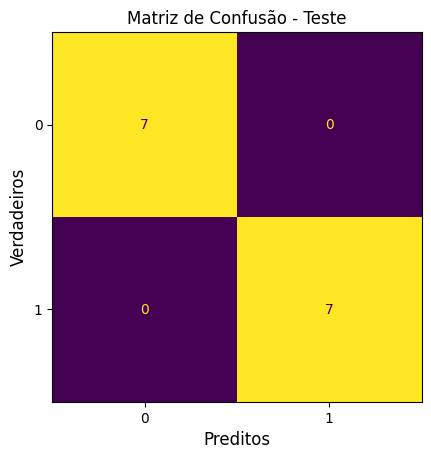

In [71]:
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib

ultimo_campeonato = pd.read_csv('./test_data.csv')

# # 2. Preparar os dados: Dividir entre recursos (X) e alvo (y)
X = ultimo_campeonato.drop(['teamOneWon', 'teamTwoWon'], axis=1)

# Target (coluna que será prevista)
y = ultimo_campeonato['teamOneWon']

# 3. Carregar o modelo salvo em joblib
modelo = joblib.load('./trained_model.joblib')

# 4. Fazer previsões com o conjunto de teste
previsoes = modelo.predict(X)

print(classification_report(y, previsoes))

# 5. Avaliar o modelo usando a acurácia (para problemas de classificação)
acuracia = accuracy_score(y, previsoes)
print(f"Acurácia do modelo: {acuracia:.2f}")

# Matriz de confusão
cm = confusion_matrix(y, previsoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(colorbar=False)
plt.title('Matriz de Confusão - Teste')
plt.xlabel('Preditos', fontsize=12)
plt.ylabel('Verdadeiros', fontsize=12)
plt.show()

## Gradient Boosting

In [76]:
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

full_matches_train_data = pd.read_csv('./train_data.csv')

# Features (colunas que serão utilizadas para fazer a previsão)
X = full_matches_train_data.drop(['teamOneWon', 'teamTwoWon'], axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

# Target (coluna que será prevista)
y = full_matches_train_data['teamOneWon']
y = y.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanciar um modelo XGBoost
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo de XGBoost: {accuracy:.2f}')
print(f"Score do modelo de XGBoost: {model.score(X_test, y_test)}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

Acurácia do Modelo de XGBoost: 0.88
Score do modelo de XGBoost: 0.8820083682008368
              precision    recall  f1-score   support

       False       0.88      0.87      0.88       572
        True       0.88      0.89      0.89       623

    accuracy                           0.88      1195
   macro avg       0.88      0.88      0.88      1195
weighted avg       0.88      0.88      0.88      1195



## Regressão Linear

In [77]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

full_matches_train_data = pd.read_csv('./train_data.csv')

# Features (colunas que serão utilizadas para fazer a previsão)
X = full_matches_train_data.drop(['teamOneWon', 'teamTwoWon'], axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

# Target (coluna que será prevista)
y = full_matches_train_data['teamOneWon']
y = y.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Treinar o modelo com a base de treino
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo: {accuracy:.2f}')
print(f"Score do modelo: {model.score(X_test, y_test)}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

Acurácia do Modelo: 0.79
Score do modelo: 0.7927686642115835
              precision    recall  f1-score   support

       False       0.76      0.80      0.78      1387
        True       0.82      0.79      0.80      1600

    accuracy                           0.79      2987
   macro avg       0.79      0.79      0.79      2987
weighted avg       0.79      0.79      0.79      2987

